In [1]:
import os
import numpy as np
import pandas as pd
import sys
import matplotlib.pyplot as plt
import seaborn

%matplotlib inline
plt.style.use('ggplot')

sys.setrecursionlimit(20000)

In [2]:
def probability_of_streak(numGames, winStreak, winPercent, saved = None):
        
        if saved == None: saved = {}
        
        ID = (numGames, winStreak, winPercent)
        
        if ID in saved: return saved[ID]
        else: 
            if winStreak > numGames or numGames <=0:
                result = 0
            else:
                result = winPercent**winStreak
                for firstWin in xrange(1, winStreak+1):
                    pr = probability_of_streak(numGames-firstWin, winStreak, winPercent, saved)
                    result += (winPercent**(firstWin-1))*(1-winPercent)*pr

        saved[ID] = result
                               
        return result

In [3]:
def probability_of_streak2(M, N, p):
    #N = run length (r)
    #M = number of flips (n)
    #p = probability of success
    q = 1-p #probability of failure
    
    #setting up P_i (P[i] will be the probability that we see a run of length N in i flips)
    P = [None for i in range(0,M+1)] #initialize list to all Nones

    for i in range(0,N): #set boundary conditions, (not including P_N (r)
        P[i] = 0

    P[N] = p**N #P_N (r) is now equal to p^N

    #now for main recursion (using a loop here instead)
    for i in range(N,M):
        P[i +1] = P[i] + (1-P[i-N])*q* (p**N)

    return P[M]

In [5]:
import time 
t0 = time.time()
probability_of_streak(162,9,.5)
t1 = time.time()

total1 = t1-t0

t0 = time.time()
probability_of_streak2(162,9,.5)
t1 = time.time()

total2 = t1-t0

In [5]:
print total1
print total2

0.00467920303345
0.000339984893799


In [6]:
def consecutive(data, stepsize=0):
    sched = np.zeros(np.size(data))
    sched[np.isin(data,'W')] = 1
    return np.split(sched, np.where(np.diff(sched) != stepsize)[0]+1)

In [7]:
def group_streaks(sched):
    all_streaks = consecutive(sched)
    longest_streak = np.size(max(all_streaks,key=len))
    wins = np.zeros(longest_streak)
    loss = np.zeros(longest_streak)
    for i in all_streaks:
        ind = np.size(i)-1
        if i[0] == 1:
            wins[ind] += 1
        else:
            loss[ind] += 1
            
    return [wins, loss]    

In [8]:
def winning_percentage(streaks):
    wp = {}
    gp = {}
    for team in streaks:
        total_number_games = np.sum((np.arange(np.size(streaks[team][0]))+1) * streaks[team][0]) + np.sum((np.arange(np.size(streaks[team][1]))+1) * streaks[team][1])
        gp[team] = total_number_games
        wp[team] = np.sum((np.arange(np.size(streaks[team][0]))+1) * streaks[team][0]) / total_number_games
    return wp,gp

In [9]:
path_files = '/data/baseball/Baseball-Reference/schedule_results/2018/'
leagues    = ['AL','NL']

In [10]:
streaks = {}
for league in leagues:
    path_csv = path_files + league + '/'
    #print path_csv
    fnames = os.listdir(path_csv)
    #print fnames
    for itm in fnames:
        #print itm
        team = itm.split('.')[0].split('_')[0]
        #print team
        pd.read_csv(path_csv+itm)
        df = pd.read_csv(path_csv+itm)
        df['W/L'][df['W/L'] == 'W-wo'] = 'W'
        df['W/L'][df['W/L'] == 'L-wo'] = 'L'
        a = df['W/L'].values
        streaks[team] = group_streaks(a)

/Users/marcoviero/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]
/Users/marcoviero/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [11]:
for t in streaks:
    print streaks[t][0]

[18. 14.  4.  5.  1.  0.  0.  1.  1.]
[18. 11.  9.  2.  1.  0.  0.  2.]
[20.  7.  4.  4.  2.  1.  0.  0.]
[28.  3.  6.  4.  1.]
[18. 11.  5.  2.  3.  2.]
[ 7. 12.  5.  6.  1.  1.  0.  1.  1.  1.]
[27.  7.  2.  3.  1.  0.  0.  0.  0.  0.  0.]
[22. 10.  4.  0.  0.  1.  1.  0.]
[25. 13.  3.  2.  0.  0.  0.  0.  1.]
[27.  5.  2.  1.  0.  0.  0.  0.  0.]
[15.  7.  5.  4.  2.  1.  1.  1.]
[19. 10.  3.  5.  1.  4.]
[25. 11.  3.  1.  0.  0.  1.]
[22. 12.  3.  2.  0.  0.]
[27.  8.  4.  4.  2.  0.  0.  1.]
[22.  8.  3.  1.  4.  0.  0.  0.  0.  0.  1.]
[20. 14.  4.  3.  2.  1.  1.]
[19. 14.  5.  2.  2.  0.  0.  1.]
[23.  9.  7.  0.  2.  2.  1.]
[22. 10.  4.  2.  0.  0.  0.  0.]
[12.  7.  7.  1.  3.  3.  1.  0.  0.  0.  0.  1.]
[18.  8.  6.  4.  1.  0.  0.  0.  0.  0.  0.]
[13. 15.  8.  3.  1.  1.  1.]
[23. 10.  4.  2.  1.  2.  0.  0.  0.]
[29.  9.  5.  1.  0.  0.  0.]
[12.  9.  8.  7.  2.  0.]
[16.  6.  4.  2.  4.  1.  0.  2.]
[17.  9.  4.  5.  0.  1.  1.]
[25.  7.  3.  1.  0.  1.  0.  0.  0.  0.

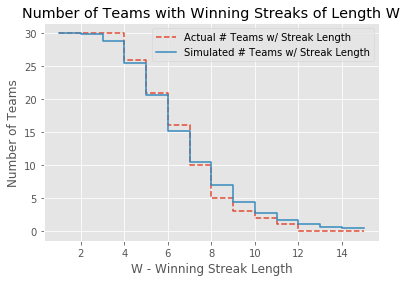

In [12]:
streak_size = 15
win_percent, games_played = winning_percentage(streaks)
real_win_streaks  = np.zeros(streak_size)
cum_win_streaks  = np.zeros(streak_size)
win_predict = np.zeros(streak_size)
for t in streaks:
    x = (np.arange(np.size(streaks[t][0])))
    cumulative_wins = np.cumsum(streaks[t][0][::-1])[::-1] 
    ind_non_zero = np.where(streaks[t][0] > 0)
    cind_non_zero = np.where(cumulative_wins > 0)
    real_win_streaks[x[ind_non_zero]] += 1
    cum_win_streaks[x[cind_non_zero]] += 1
    for p in np.arange(streak_size):
        win_predict[p] += probability_of_streak(games_played[t], p+1, win_percent[t])
        
#plt.step(np.arange(streak_size)+1,win_tally)

#plt.step(np.arange(streak_size)+1,real_win_streaks,linestyle = ':')
plt.step(np.arange(streak_size)+1,cum_win_streaks,linestyle = '--',label='Actual # Teams w/ Streak Length')
plt.step(np.arange(streak_size)+1,win_predict,label='Simulated # Teams w/ Streak Length')
plt.legend()
plt.title('Number of Teams with Winning Streaks of Length W')
plt.xlabel('W - Winning Streak Length')
plt.ylabel('Number of Teams')
#ax.set_xlim(23.5, 28)
#ax.set_ylim(1, 30)
#ax.grid(True)
#plt.yscale('log')
plt.show()

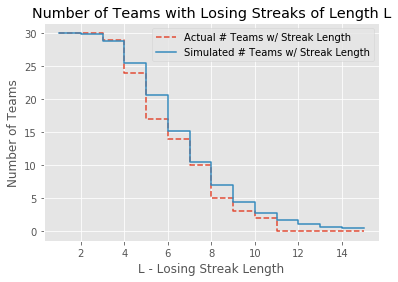

In [13]:
streak_size = 15
lose_percent, games_played = winning_percentage(streaks)
real_lose_streaks  = np.zeros(streak_size)
cum_lose_streaks  = np.zeros(streak_size)
lose_predict = np.zeros(streak_size)
for t in streaks:
    x = (np.arange(np.size(streaks[t][1])))
    cumulative_losses = np.cumsum(streaks[t][1][::-1])[::-1] 
    ind_non_zero = np.where(streaks[t][1] > 0)
    cind_non_zero = np.where(cumulative_losses > 0)
    real_lose_streaks[x[ind_non_zero]] += 1
    cum_lose_streaks[x[cind_non_zero]] += 1
    for p in np.arange(streak_size):
        lose_predict[p] += probability_of_streak(games_played[t], p+1, lose_percent[t])
        
#plt.step(np.arange(streak_size)+1,win_tally)

#plt.step(np.arange(streak_size)+1,real_win_streaks,linestyle = ':')
plt.step(np.arange(streak_size)+1,cum_lose_streaks,linestyle = '--',label='Actual # Teams w/ Streak Length')
plt.step(np.arange(streak_size)+1,lose_predict,label='Simulated # Teams w/ Streak Length')
plt.legend()
plt.title('Number of Teams with Losing Streaks of Length L')
plt.xlabel('L - Losing Streak Length')
plt.ylabel('Number of Teams')
#ax.set_xlim(23.5, 28)
#ax.set_ylim(1, 30)
#ax.grid(True)
#plt.yscale('log')
plt.show()

In [48]:
print np.arange(14)+1
print real_win_streaks
print cum_win_streaks

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14]
[30. 30. 30. 28. 21. 14.  8.  7.  3.  1.  1.  1.  0.  0.  0.]
[30. 30. 30. 30. 26. 21. 16. 10.  5.  3.  2.  1.  0.  0.  0.]


In [44]:
print real_lose_streaks
print cum_lose_streaks

[30. 30. 30. 25. 21. 13.  7.  6.  3.  1.  2.  0.  0.  0.  0.]
[30. 30. 30. 29. 24. 17. 14. 10.  5.  3.  2.  0.  0.  0.  0.]


In [45]:
np.cumsum(streaks['ARI'][1][::-1])[::-1]

array([42., 18.,  9.,  6.,  2.,  2.,  1.])

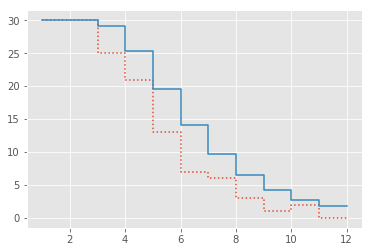

In [49]:
win_percent, games_played = winning_percentage(streaks)
loss_tally = np.zeros(12)
real_losing_streaks  = np.zeros(12)
loss_predict = np.zeros(12)
for t in streaks:
    x = (np.arange(np.size(streaks[t][1])))
    loss_tally[x] += streaks[t][1]
    ind_non_zero = np.where(streaks[t][1] > 0)
    real_losing_streaks[x[ind_non_zero]] += 1
    for p in np.arange(12):
        loss_predict[p] += probability_of_streak(games_played[t], p+1, 1-win_percent[t])
        
#plt.step(np.arange(12)+1,win_tally)
plt.step(np.arange(12)+1,real_losing_streaks,linestyle = ':')
plt.step(np.arange(12)+1,loss_predict)
#ax.set_xlim(23.5, 28)
#ax.set_ylim(1, 30)
#ax.grid(True)
#plt.yscale('log')
plt.show()

In [304]:
print real_win_streaks
print win_predict

[30. 30. 30. 28. 21. 14.  8.  7.  3.  1.  1.  1.]
[30.         29.99998995 29.93826556 28.89259305 25.54668016 20.556594
 15.22544837 10.52581339  6.91734405  4.39639734  2.73807727  1.68630468]
[162.0, 163.0, 162.0, 162.0, 162.0, 162.0, 162.0, 162.0, 162.0, 162.0, 163.0, 162.0, 161.0, 162.0, 162.0, 161.0, 163.0, 162.0, 162.0, 162.0, 162.0, 162.0, 162.0, 162.0, 162.0, 163.0, 162.0, 162.0, 162.0, 162.0]


In [222]:
print np.arange(12)+1
print win_tally

[ 1  2  3  4  5  6  7  8  9 10 11 12]
[608. 286. 144.  81.  38.  22.   8.   9.   3.   1.   1.   1.]


In [160]:
print streaks.keys()

['NYY', 'MIL', 'MIN', 'TOR', 'ATL', 'BOS', 'DET', 'CIN', 'NYM', 'BAL', 'COL', 'OAK', 'TEX', 'MIA', 'SEA', 'PIT', 'CHC', 'STL', 'CLE', 'CWS', 'HOU', 'SFG', 'WAS', 'PHI', 'SDP', 'LAD', 'TBR', 'LAA', 'KCR', 'ARI']


In [176]:
print streaks['TOR'][0]
print streaks['TOR'][1]

[28.  3.  6.  4.  1.]
[17. 13.  7.  5.  1.]


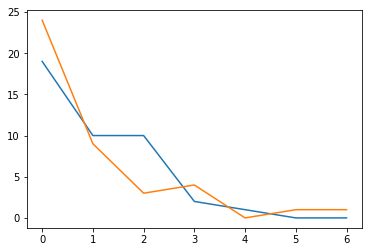

In [174]:
plt.plot(streaks['ARI'][0])
plt.plot(streaks['ARI'][1])

In [80]:
np.where(a[1:] != a[:-1])[0] + 1

array([  2,   4,   5,   7,   8,   9,  12,  15,  16,  19,  21,  22,  24,
        27,  30,  36,  39,  40,  41,  42,  43,  45,  47,  48,  50,  51,
        52,  55,  59,  61,  66,  67,  68,  69,  72,  76,  80,  83,  84,
        89,  91,  98, 100, 104, 105, 106, 110, 112, 115, 119, 120, 124,
       125, 127, 128, 129, 131, 132, 134, 139, 140, 141, 142, 143, 144,
       146, 148, 149, 152, 160, 161, 162])

In [67]:
np.where(sched[1:] != sched[:-1])[0] + 1

array([  2,   4,   5,   7,  12,  15,  16,  19,  21,  22,  24,  27,  30,
        36,  39,  40,  41,  42,  43,  45,  47,  48,  50,  51,  52,  53,
        54,  55,  59,  61,  66,  67,  68,  69,  72,  76,  80,  83,  84,
        89,  91,  95,  96,  98, 101, 104, 105, 106, 110, 112, 115, 116,
       118, 119, 120, 124, 125, 126, 128, 129, 131, 132, 134, 139, 140,
       141, 142, 143, 145, 146, 148, 149, 152, 160, 161, 162])

In [66]:
sched = np.zeros(np.size(a))
sched[np.isin(a,'W')] = 1
sched

array([0., 0., 1., 1., 0., 1., 1., 0., 0., 0., 0., 0., 1., 1., 1., 0., 1.,
       1., 1., 0., 0., 1., 0., 0., 1., 1., 1., 0., 0., 0., 1., 1., 1., 1.,
       1., 1., 0., 0., 0., 1., 0., 1., 0., 1., 1., 0., 0., 1., 0., 0., 1.,
       0., 1., 0., 1., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 0.,
       1., 0., 0., 0., 1., 1., 1., 1., 0., 0., 0., 0., 1., 1., 1., 0., 1.,
       1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 0., 1., 1., 0., 0., 0., 1.,
       1., 1., 0., 1., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1., 0., 0., 1.,
       0., 1., 1., 1., 1., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 1., 1.,
       1., 1., 1., 0., 1., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 0., 1., 0.])

In [87]:
streak_data = consecutive(a)

In [118]:
any(1 in i for i in streak_data)

True

In [146]:
[w,l] = classify_streaks(a)
print w
print l

In [149]:
print w
print l

[15.  7.  5.  4.  2.  1.  1.  1.]
[17. 10.  6.  3.  1.  0.  0.  0.]


In [129]:
df['W/L'][8].split('-')[0]

'W'

In [54]:
df

,Gm#,Date,Tm,Unnamed: 3,Opp,W/L,R,RA,Inn,W-L,Rank,GB,Win,Loss,Save,Time,D/N,Attendance,Streak
0,1,Thursday Mar 29,COL,@,ARI,L,2,8,NaN,0-1,3,1.0,Corbin,Gray,NaN,3:36,N,48703,-
1,2,Friday Mar 30,COL,@,ARI,L,8,9,NaN,0-2,3,2.0,Ray,Senzatela,Boxberger,3:22,N,23937,--
2,3,Saturday Mar 31,COL,@,ARI,W,2,1,NaN,1-2,3,1.0,Shaw,Salas,Davis,2:54,N,33346,+
3,4,Monday Apr 2,COL,@,SDP,W,7,4,NaN,2-2,2,1.0,Bettis,Mitchell,Davis,3:11,N,16899,++
4,5,Tuesday Apr 3,COL,@,SDP,L,4,8,NaN,2-3,2,2.0,Ross,Freeland,Hand,2:47,N,19283,-
5,6,Wednesday Apr 4,COL,@,SDP,W,5,2,NaN,3-3,2,2.0,Gray,Richard,Davis,2:41,N,19698,+
6,7,Thursday Apr 5,COL,@,SDP,W,3,1,NaN,4-3,2,2.0,Ottavino,Hand,Davis,2:58,D,20509,++
7,8,Friday Apr 6,COL,NaN,ATL,L,3,8,NaN,4-4,2,2.5,McCarthy,Marquez,NaN,2:56,D,48216,-
8,9,Saturday Apr 7,COL,NaN,ATL,W-wo,3,2,10.0,5-4,2,1.5,Ottavino,Vizcaino,NaN,3:28,N,40120,+
9,10,Sunday Apr 8,COL,NaN,ATL,L,0,4,NaN,5-5,2,2.5,Newcomb,Freeland,NaN,2:26,D,42031,-


In [12]:
probOfStreak(162,10,.60)

0.3183344242913501